In [5]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
#load data

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [7]:
#Menampilkan 5(default) data pertama

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#melihat jumlah data dari semua atribut/kolom yang tidak memiliki nilai

column_names = train_data.columns
for column in column_names:
    print(column + ' -n ' + str(train_data[column].isnull().sum()))

PassengerId -n 0
Survived -n 0
Pclass -n 0
Name -n 0
Sex -n 0
Age -n 177
SibSp -n 0
Parch -n 0
Ticket -n 0
Fare -n 0
Cabin -n 687
Embarked -n 2


In [25]:
#Atribut survived = atribut yang menjadi target dalam analisis

train_data['Pclass'].value_counts()
train_data['Sex'].value_counts()
train_data['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

Text(0, 0.5, 'Jumlah penumpang')

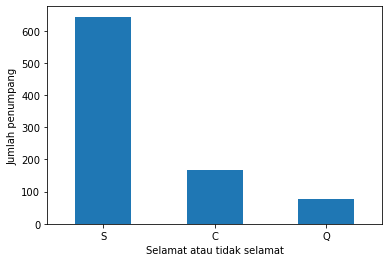

In [26]:
#untuk menampilkan grafik batang bisa menggunakan method plot(kind=’bar’).

dt = train_data['Survived'].value_counts()
plt = dt.plot(kind = 'bar', rot = 0)
plt.set_xlabel('Selamat atau tidak selamat')
plt.set_ylabel('Jumlah penumpang')


Text(0, 0.5, 'Probabilitas Selamat')

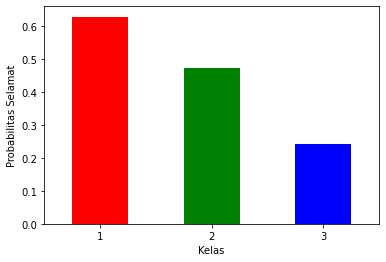

In [18]:
# melihat tingkat kemungkinan keselamatan (Survived) berdasarkan 
#kelas penumpang (Pclass).

dt = train_data[['Pclass', 'Survived']].groupby(
    'Pclass').mean().Survived
plt = dt.plot(kind = 'bar', rot = 0, color = ['red', 'green', 'blue'])
plt.set_xlabel('Kelas')
plt.set_ylabel('Probabilitas Selamat')


C:\Users\MSI GF63\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


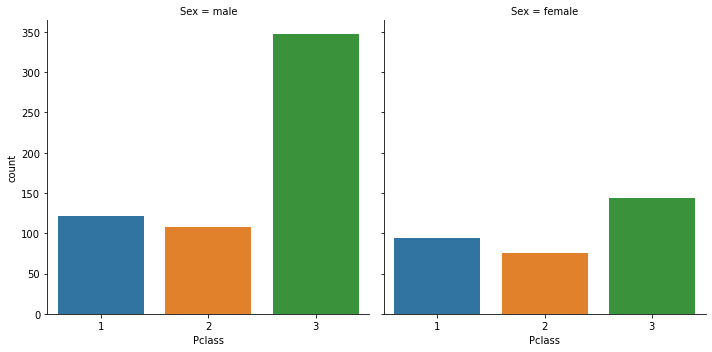

In [11]:
#Dataset Titanic juga bisa dilihat secara multidimensi dengan kode 
#python, yaitu dengan menggunakan seaborn (sns) dan method 
#catplot(). Misalnya untuk menampilkan kelas penumpang (Pclass) 
#vs. jenis kelamin (Sex).

sns.catplot('Pclass', col = 'Sex', data = train_data, kind = 'count')

In [12]:
#Menghapus colom menggunakan drop

train_data = train_data.drop(columns = ['Ticket', 'PassengerId', 'Cabin'])

train_data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [13]:
train_data['FamilySize'] = train_data['SibSp'] +train_data['Parch'] + 1
train_data.head()

#Hasil penambahan fitur baru bisa dilihat dari kolom FamilySize yang berada di paling kanan

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [14]:
train_data['sex'] = train_data['Sex'].map({'male' : 0, 'female' : 1})
train_data['Embarked'] = train_data['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,sex
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,2.0,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,0.0,2,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,2.0,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,2.0,2,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,2.0,1,0


In [15]:
train_data['Title'] = train_data['Name'].str.extract(
    '([A-Za-z]+)\.', expand = False)
train_data = train_data.drop(columns = 'Name')
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,sex,Title
0,0,3,male,22.0,1,0,7.2500,2.0,2,0,Mr
1,1,1,female,38.0,1,0,71.2833,0.0,2,1,Mrs
2,1,3,female,26.0,0,0,7.9250,2.0,1,1,Miss
3,1,1,female,35.0,1,0,53.1000,2.0,2,1,Mrs
4,0,3,male,35.0,0,0,8.0500,2.0,1,0,Mr


<AxesSubplot:>

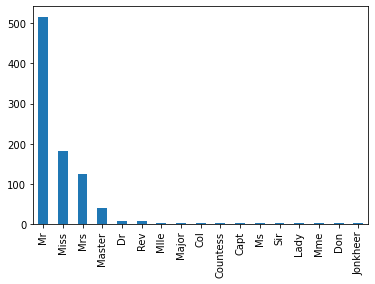

In [16]:
train_data['Title'].value_counts().plot(kind = 'bar')


Text(0, 0.5, 'Jumlah Penumpang')

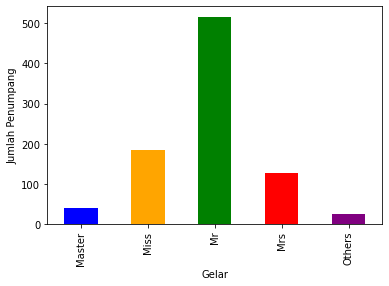

In [17]:
train_data['Title'] = train_data['Title'].replace(
['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')

plt = train_data['Title'].value_counts().sort_index().plot(
    kind = 'bar', color = ['blue', 'orange', 'green', 'red', 'purple'])
plt.set_xlabel('Gelar')
plt.set_ylabel('Jumlah Penumpang')

In [18]:
corr_matrix = train_data.corr()

<AxesSubplot:>

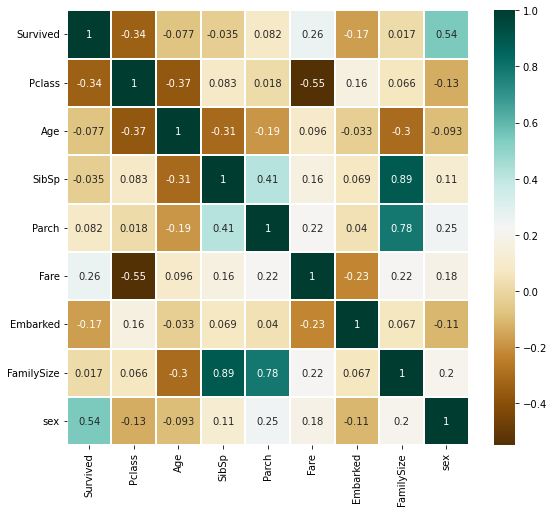

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 8))
sns.heatmap(data = corr_matrix, cmap = 'BrBG', annot = True, linewidths = 0.2)

In [20]:
missing = train_data['Embarked'].isnull().sum()
print("Jumlah data kosong pada atribut Embarked :", missing)

Jumlah data kosong pada atribut Embarked : 2


Text(0, 0.5, 'Jumlah Penumpang')

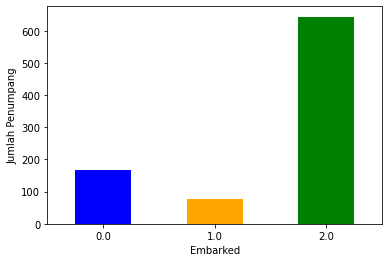

In [21]:
plt = train_data['Embarked'].value_counts().sort_index().plot(
    kind = 'bar', color=['blue', 'orange', 'green'], rot = 0)
plt.set_xlabel('Embarked')
plt.set_ylabel('Jumlah Penumpang')

In [22]:
train_data['Embarked'] = train_data['Embarked'].fillna(2)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,sex,Title
0,0,3,male,22.0,1,0,7.2500,2.0,2,0,Mr
1,1,1,female,38.0,1,0,71.2833,0.0,2,1,Mrs
2,1,3,female,26.0,0,0,7.9250,2.0,1,1,Miss
3,1,1,female,35.0,1,0,53.1000,2.0,2,1,Mrs
4,0,3,male,35.0,0,0,8.0500,2.0,1,0,Mr


In [23]:
Nan_indexes = train_data['Age'][train_data['Age'].isnull()].index
print(Nan_indexes)

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)


In [24]:
for i in Nan_indexes:
    pred_age = train_data['Age'][((train_data.SibSp == train_data.iloc[i]["SibSp"]) &
                                (train_data.Parch == train_data.iloc[i]["Parch"]) &
                                (train_data.Pclass == train_data.iloc[i]["Pclass"])
                                 )].median()
    if np.isnan(pred_age):
        train_data['Age'].iloc[i] = train_data['Age'].median()
    else:
        train_data['Age'].iloc[i] = pred_age

C:\Users\MSI GF63\AppData\Local\Temp\ipykernel_21992\88703671.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'].iloc[i] = pred_age
C:\Users\MSI GF63\AppData\Local\Temp\ipykernel_21992\88703671.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'].iloc[i] = train_data['Age'].median()


In [45]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
sex           0
Title         0
dtype: int64

In [25]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,sex,Title
0,0,3,male,22.0,1,0,7.2500,2.0,2,0,Mr
1,1,1,female,38.0,1,0,71.2833,0.0,2,1,Mrs
2,1,3,female,26.0,0,0,7.9250,2.0,1,1,Miss
3,1,1,female,35.0,1,0,53.1000,2.0,2,1,Mrs
4,0,3,male,35.0,0,0,8.0500,2.0,1,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,2.0,1,0,Others
887,1,1,female,19.0,0,0,30.0000,2.0,1,1,Miss
888,0,3,female,13.5,1,2,23.4500,2.0,4,1,Miss
889,1,1,male,26.0,0,0,30.0000,0.0,1,0,Mr
